<a href="https://colab.research.google.com/github/alex-smith-uwec/CS491/blob/main/top2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
my_path="/content/drive/MyDrive/CS491/Data/US_Inaugural_Addresses"

In [3]:
import os
documents = []

for file in os.listdir(my_path):
    if file.endswith(".txt"):
        file_path = os.path.join(my_path, file)
        with open(file_path, 'r', encoding='utf-8') as f:
            content = f.read()
            documents.append(content)  # Add the raw content to the documents list


In [4]:
!pip install top2vec -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 35.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 5.8 MB/s eta 0:00:00


In [5]:
from top2vec import Top2Vec

# Assuming 'documents' is a list of text documents you wish to model
model = Top2Vec(documents, embedding_model='doc2vec', workers=2)
# model = Top2Vec(documents, embedding_model='universal-sentence-encoder', workers=2, use_embedding_model_tokenizer=True)


# Now you can use the model to find topics, get topic sizes, etc.
topics = model.get_topics()


2024-03-17 20:42:17,379 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2024-03-17 20:42:18,123 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2024-03-17 20:42:22,904 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2024-03-17 20:42:33,460 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2024-03-17 20:42:33,469 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [14]:
topics_words, word_scores, topic_nums = model.get_topics()


In [17]:
topics_words

array([['support', 'general', 'present', 'experience', 'subject',
        'executive', 'duty', 'however', 'interests', 'should',
        'influence', 'necessary', 'public', 'purposes', 'interest',
        'state', 'administration', 'respect', 'foreign', 'system',
        'authority', 'without', 'civil', 'with', 'which', 'institutions',
        'protection', 'course', 'duties', 'under', 'principle', 'found',
        'constitutional', 'proper', 'domestic', 'rights', 'government',
        'policy', 'such', 'states', 'countrymen', 'high', 'its',
        'governments', 'any', 'united', 'within', 'could', 'the', 'far'],
       ['lives', 'today', 'work', 'strong', 'know', 'live', 'new',
        'together', 'we', 'earth', 'america', 'faith', 'democracy',
        'way', 'come', 'seek', 'us', 'americans', 'things', 'children',
        'again', 'stand', 'where', 'here', 'god', 'see', 'what', 'world',
        'opportunity', 'up', 'history', 'out', 'men', 'century',
        'through', 'life', 'need

In [18]:
# Assuming 'model' is your trained Top2Vec model and 'keywords' is a list of keywords.
keywords = ["war", "liberty"]
documents, document_score, document_ids = model.search_documents_by_keywords(keywords=keywords, num_docs=10)

# This will return the top 10 most similar documents to the provided keywords,
# their similarity scores, and their IDs within the model.


In [19]:
# Print the results
for i in range(len(documents)):
    print(f"Document ID: {document_ids[i]}")
    print(f"Similarity Score: {document_score[i]}")
    print(f"Document Content: {documents[i][:20]}...")  # Print the first 200 characters to get an idea of the document content
    print("---")

Document ID: 40
Similarity Score: 0.8121671676635742
Document Content: George Washington	17...
---
Document ID: 28
Similarity Score: 0.7813536524772644
Document Content: James Madison	1813-0...
---
Document ID: 45
Similarity Score: 0.7754977345466614
Document Content: Abraham Lincoln	1865...
---
Document ID: 25
Similarity Score: 0.749323308467865
Document Content: Thomas Jefferson	180...
---
Document ID: 35
Similarity Score: 0.7074759602546692
Document Content: James Madison	1809-0...
---
Document ID: 21
Similarity Score: 0.6792150735855103
Document Content: John Quincy Adams	18...
---
Document ID: 11
Similarity Score: 0.6783073544502258
Document Content: James A. Garfield	18...
---
Document ID: 30
Similarity Score: 0.677327036857605
Document Content: James Monroe	1817-03...
---
Document ID: 27
Similarity Score: 0.6695162057876587
Document Content: Thomas Jefferson	180...
---
Document ID: 9
Similarity Score: 0.6557906866073608
Document Content: William McKinley	3/4...
---


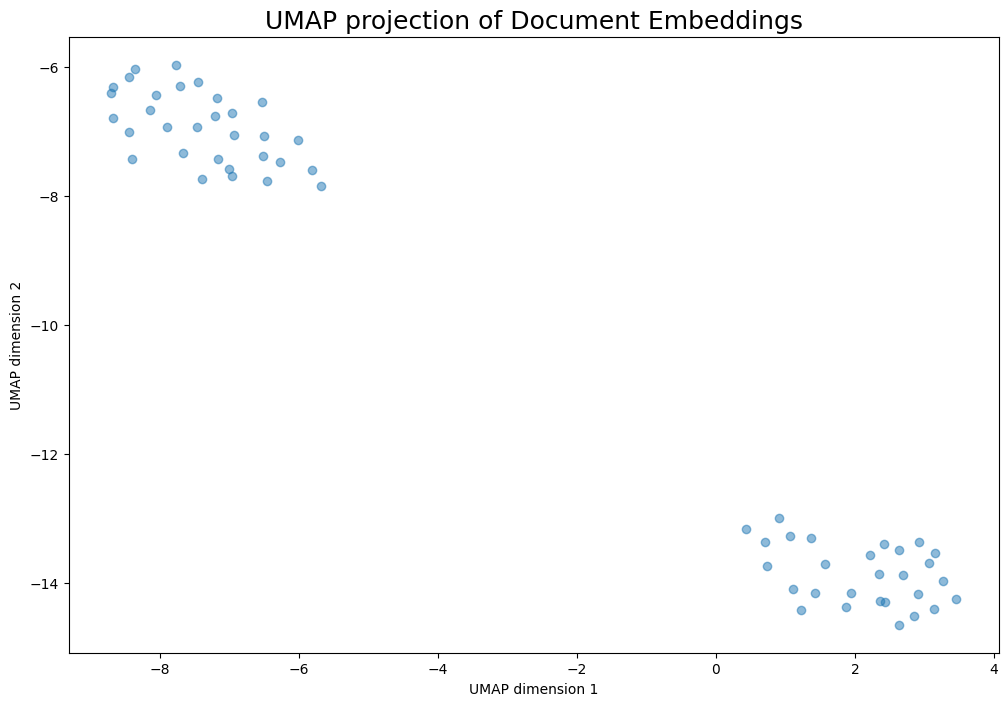

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import umap.umap_ as umap  # UMAP for dimensionality reduction

# Assuming 'model' is your trained Top2Vec model

# Retrieve document embeddings from the Top2Vec model
document_embeddings = model.document_vectors

# Reduce the dimensionality of embeddings to 2D for visualization
umap_embeddings = umap.UMAP(n_neighbors=15, n_components=2, metric='cosine').fit_transform(document_embeddings)

# Plot the UMAP embeddings
plt.figure(figsize=(12, 8))
plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], alpha=0.5)
plt.title('UMAP projection of Document Embeddings', fontsize=18)
plt.xlabel('UMAP dimension 1')
plt.ylabel('UMAP dimension 2')
plt.show()


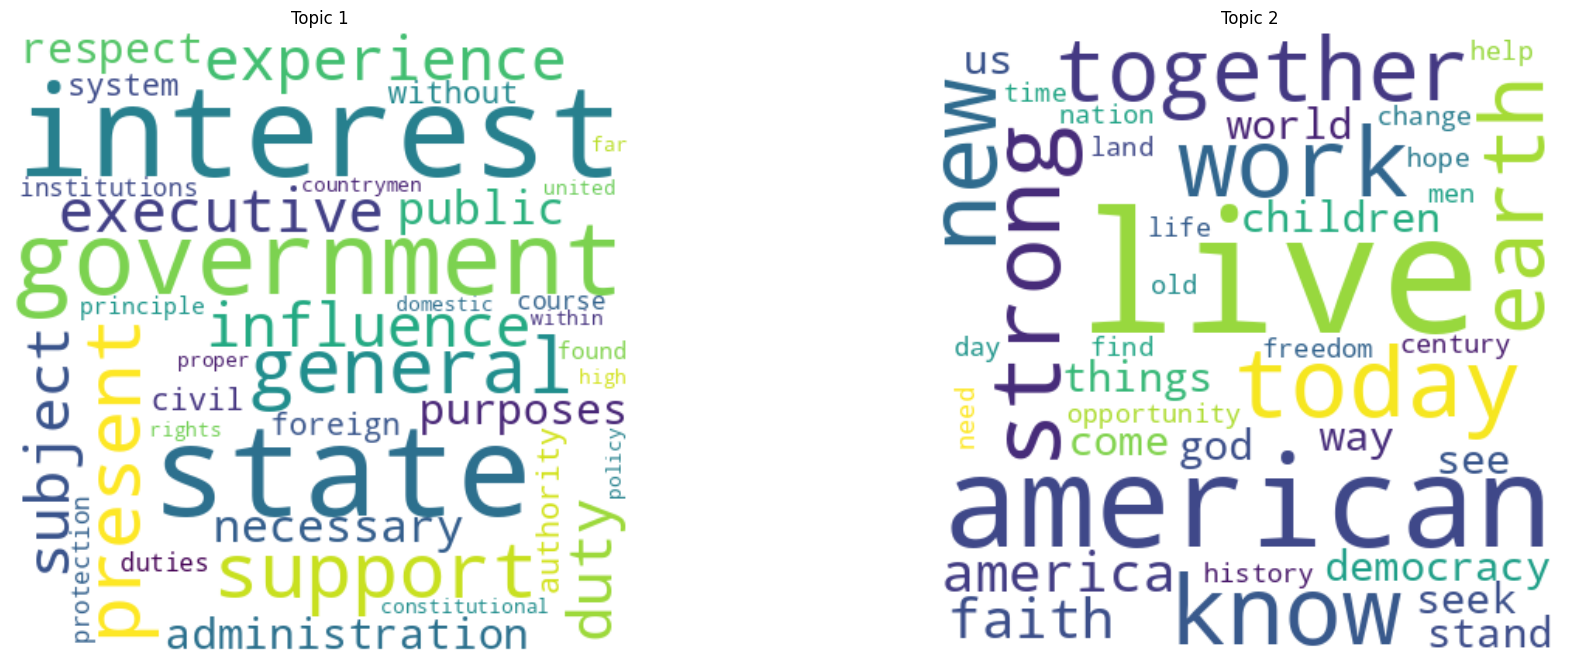

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have already retrieved topics_words from your model
# And there are only two topics

# Set up the figure size
fig, axes = plt.subplots(1, 2, figsize=(20, 10))  # Adjust figsize to your liking

for i in range(2):  # Loop through the two topics
    # Generate a single string with all words for the topic
    topic_words_combined = ' '.join(topics_words[i])

    # Generate the word cloud for this topic
    wordcloud = WordCloud(width=400, height=400,
                          background_color='white',
                          min_font_size=10).generate(topic_words_combined)

    # Plot the WordCloud image
    axes[i].imshow(wordcloud, interpolation="bilinear")
    axes[i].axis("off")
    axes[i].set_title(f'Topic {i+1}')

# Adjust space between subplots
plt.subplots_adjust(wspace=0.5)  # Adjust the width spacing between the subplots

plt.show()
